<a href="https://colab.research.google.com/github/Shubhangidharmik/Yes-Bank-Stock-Closing-Prices/blob/main/yes_bank_stock_closing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Yes Bank Stock Closing Prices Prediction Analysis

**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.**

In [247]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [248]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/self practice/Yes bank capstone project 2/Copy of data_YesBank_StockPrices.csv')

In [249]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [250]:
df.shape

(185, 5)

In [251]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

# **Data Cleaning**

In [252]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [253]:
len(df[df.duplicated()])

0

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [255]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Outliers**

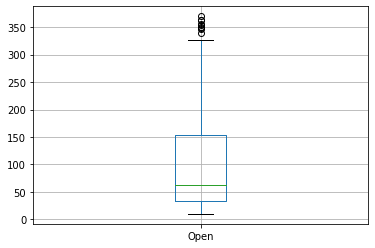

In [256]:
df.boxplot('Open')

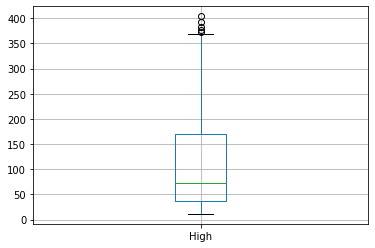

In [257]:
df.boxplot('High');

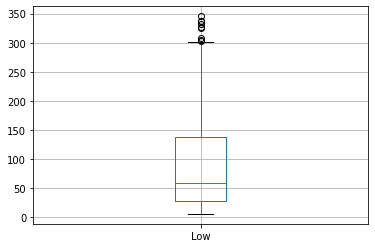

In [258]:
df.boxplot('Low');

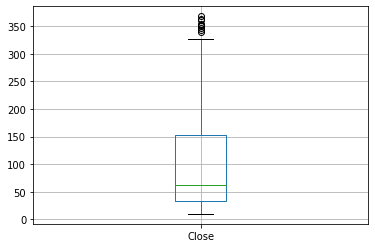

In [259]:
df.boxplot('Close');

# **Exploratory Data Analysis**

**Dependent Variable**

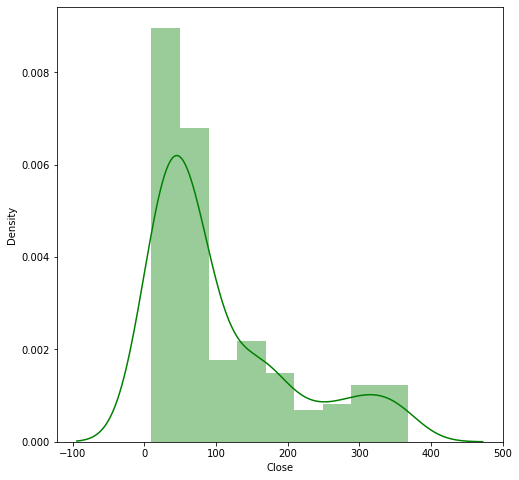

In [260]:
# Dependent variable 'close'
plt.figure(figsize=(8,8))
sns.distplot(df['Close'], color='g')

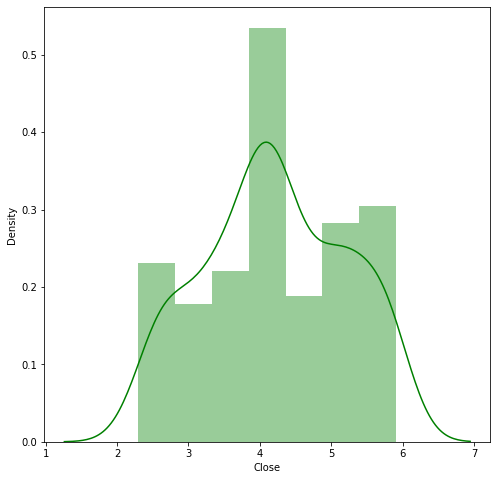

In [261]:
# For Normal Distribution
plt.figure(figsize=(8,8))
sns.distplot(np.log(df['Close']), color='g')

**Independent Variable**

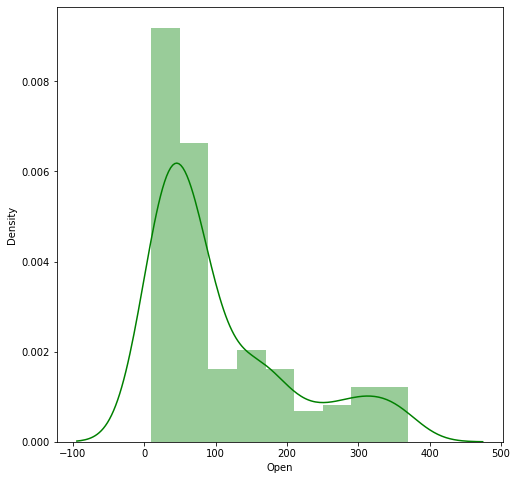

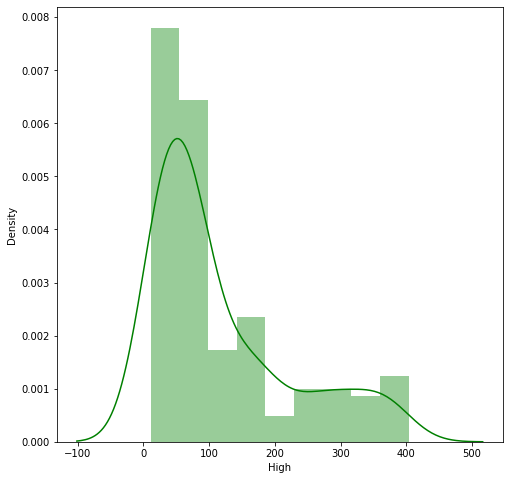

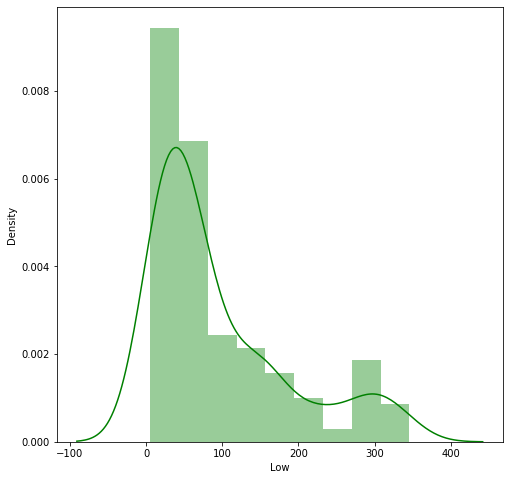

In [262]:
# Independent variables
plt.figure(figsize=(8,8))
sns.distplot(df['Open'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['High'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Low'], color='g')

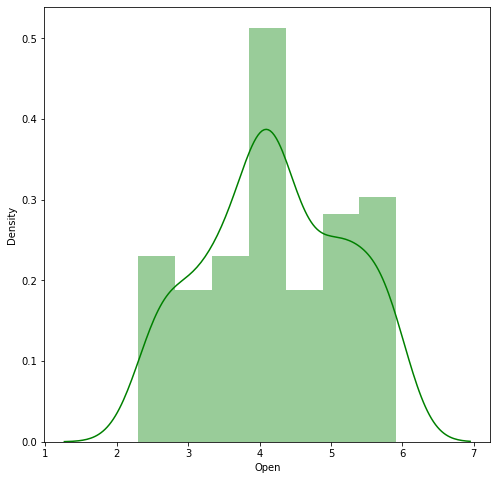

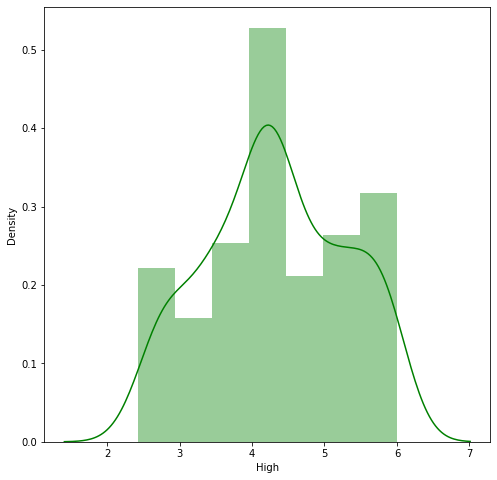

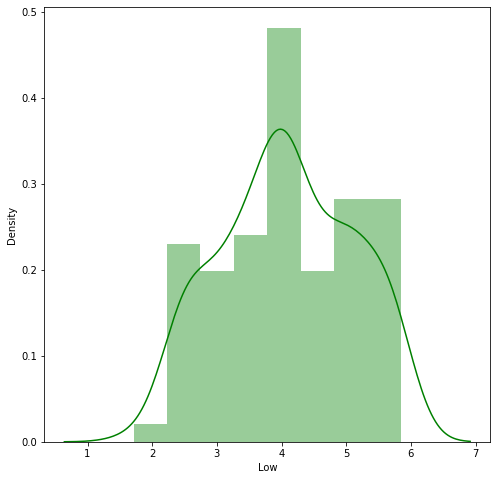

In [263]:
# For Normal Distribution
plt.figure(figsize=(8,8))
sns.distplot(np.log(df['Open']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log(df['High']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log(df['Low']), color='g')

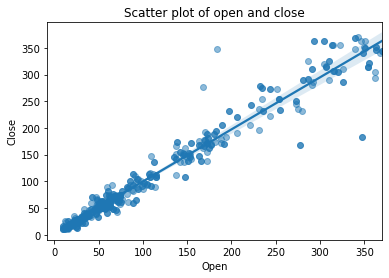

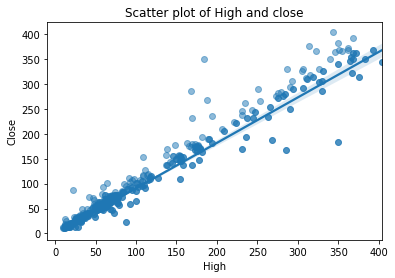

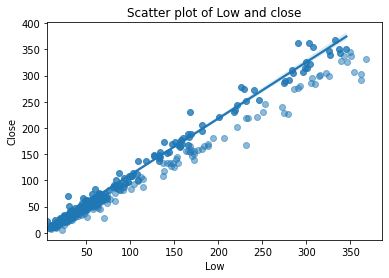

In [264]:
# To find relational between dependent variable and independent variable

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()

# **Correlation**

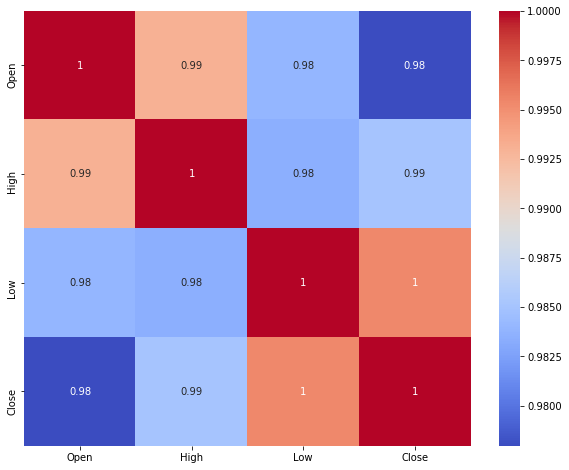

In [271]:
## Correlation
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [272]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [273]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


# **Train test split**

In [274]:
# # x is independent variables and y is dependent variables
from scipy.stats import zscore
X = df.drop(columns=['Date','Close']).apply(zscore)

In [275]:
y = np.log(df['Close'])

In [276]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [277]:
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


In [278]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [280]:
regressor.coef_

array([-0.85319604,  2.05592955,  2.12713043])

In [281]:
regressor.intercept_

3.319131203166468

In [282]:
regressor.score(X_train, y_train)

0.8209389162338134

In [283]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([3.74168514, 3.78776856, 5.8872562 , 4.9452223 , 5.43252617,
       5.14611905, 3.72968777, 3.49965791, 3.38172356, 3.37699313,
       3.69448153, 4.23327219, 3.3752771 , 3.74923339, 4.09070838,
       6.64899515, 5.59800202, 4.4027975 , 3.38902166, 3.41214217,
       3.60209979, 4.09745724, 3.84771025, 3.42225359, 3.72370924,
       3.73001632, 3.61198729, 3.86050356, 4.55019697, 3.37646867,
       3.34836857, 3.7519745 , 6.3964061 , 3.55124627, 6.37983579,
       3.85820012, 4.74857602, 3.91468997, 5.21106365, 5.42115979,
       4.78150148, 3.37994588, 3.4878741 , 3.81456086, 3.58930507,
       3.96491819, 3.48039656, 3.51902605, 3.91068309, 5.32069721,
       3.79193966, 3.76746526, 5.05251798, 3.4167622 , 3.90240426,
       3.38740114, 6.47571537, 4.04793045, 5.09428671, 5.64959013,
       3.42393051, 4.27621911, 3.54281303, 3.7090966 , 3.39148721,
       3.71033929, 3.40696682, 4.16289428, 3.89121177, 3.48490799,
       3.75783748, 3.76419372, 4.49589297, 3.33583089, 5.30581

In [284]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([3.55697836, 3.37228252, 3.75737756, 3.73603537, 3.49765925,
       4.52422035, 3.39277581, 6.63328296, 3.82766758, 3.85465674,
       3.8600083 , 6.27475018, 3.48008121, 4.72137595, 3.37190978,
       3.45610871, 3.50924289, 3.778028  , 4.76801033, 4.08366933,
       3.44901842, 6.62872719, 4.06484979, 3.51343293, 3.7120146 ,
       3.5531003 , 4.49852381, 3.37858673, 3.77485946, 3.80461656,
       6.16586424, 3.55237837, 5.61031656, 4.55361378, 3.83173021,
       3.99186047, 3.66026643])

In [285]:
# Actual test data
y_test

25     3.610648
3      2.564180
73     4.018363
171    4.254903
47     3.390473
112    4.956390
6      2.729812
146    5.857933
82     4.189958
64     4.114311
102    4.120500
151    5.775328
38     3.183456
128    5.152771
4      2.596001
46     3.223664
178    3.290266
78     4.189503
120    5.110420
92     4.450970
15     3.125883
156    5.907811
105    4.478926
179    3.242592
173    3.849083
23     3.582963
126    5.006493
40     2.506342
70     4.095511
103    4.110054
141    5.787327
34     3.438172
135    5.535443
122    4.983059
98     4.051785
87     4.410250
51     3.856722
Name: Close, dtype: float64

# **Regression Evaluation Matrics**

In [287]:
# Test performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print("MSE :",mean_squared_error(y_test, y_pred_test))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE :",mean_absolute_error(y_test, y_pred_test))
print("R2 :",r2_score(y_test, y_pred_test))

MSE : 0.18539820471261417
RMSE : 0.43057891810051985
MAE : 0.3732933477607159
R2 : 0.7950862346269352


In [289]:
# Train performance

print("MSE :",mean_squared_error(y_train, y_pred_train))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE :",mean_absolute_error(y_train, y_pred_train))
print("R2 :",r2_score(y_train, y_pred_train))

MSE : 0.1740244022237863
RMSE : 0.4171623211937846
MAE : 0.35383015015426694
R2 : 0.8209389162338134


Text(0, 0.5, 'Predicted test value')

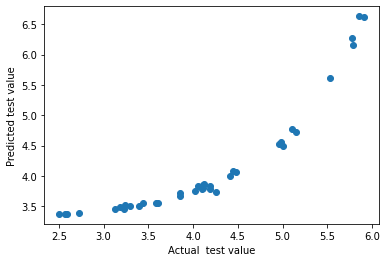

In [290]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

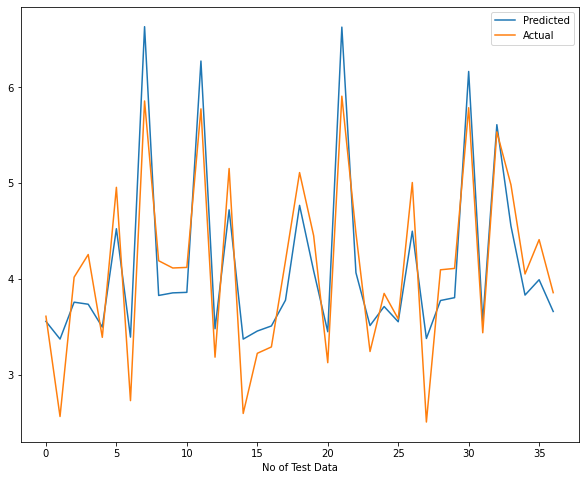

In [291]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [292]:
import statsmodels.api as sm

In [293]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [294]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     269.1
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.88e-66
Time:                        11:22:48   Log-Likelihood:                -101.73
No. Observations:                 185   AIC:                             211.5
Df Residuals:                     181   BIC:                             224.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2111      0.031    135.103      0.000       4.150       4.273
Open          -0.2349      0.282     -0.833      0.406      -0.792       0.322
High           0.6277      0.277      2.263      0.025       0.080       1.175
Low            0.4954      0.183      2.703      0.008       0.134       0.857
==============================================================================
Omnibus:                       21.281   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.618
Skew:                          -0.752   Prob(JB):                     3.33e-05
Kurtosis:                       2.357   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Implementing Lasso Regression**

In [295]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [296]:
lasso.score(X_train, y_train)

0.8198283500490496

In [297]:
y_pred_l = lasso.predict(X_test)

In [299]:
# Test performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",r2_score(y_test, y_pred_l))


MSE : 0.18349753674542013
RMSE : 0.4283661246473863
MAE : 0.3700957807112326
R2 : 0.7971869724980781


Text(0, 0.5, 'Predicted Value')

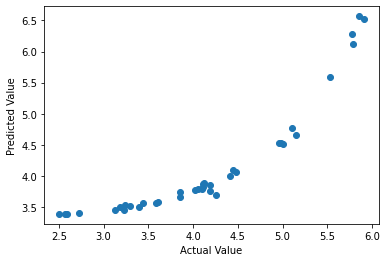

In [300]:
plt.scatter((y_test), (y_pred_l))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

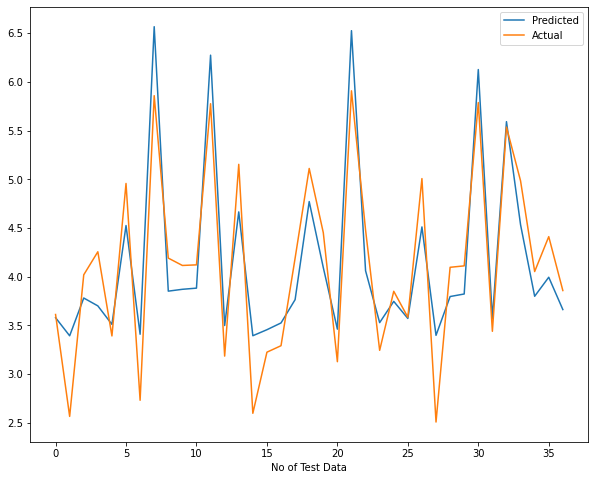

In [301]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_l)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Implementing cross validation**

In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [304]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.17852094837240978


In [305]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [307]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.1853365846524986
RMSE : 0.4305073572571073
MAE : 0.372964046798123
R2 : 0.7951543409959282


Text(0, 0.5, 'Predicted Value')

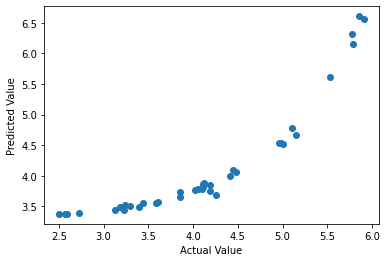

In [308]:
plt.scatter((y_test), (y_pred_lasso))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

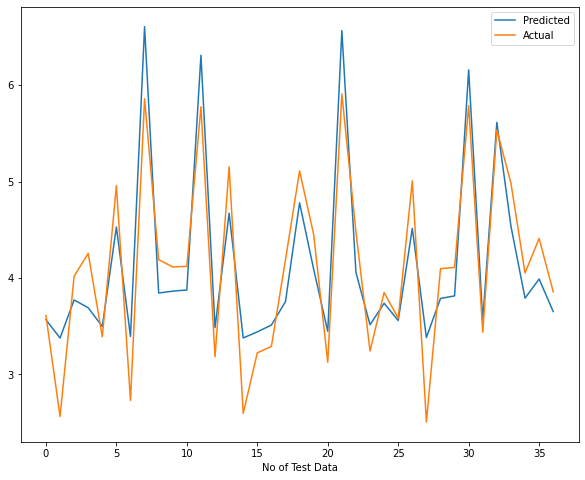

In [309]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Implementing Ridge Regression**

In [310]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [311]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [312]:
ridge.score(X_train, y_train)

0.8199706982304933

In [313]:
y_pred_r = ridge.predict(X_test)

In [314]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",r2_score(y_test, y_pred_r))

MSE : 0.18461680572175132
RMSE : 0.42967057814301335
MAE : 0.37206844787752785
R2 : 0.7959498859752566


Text(0, 0.5, 'Predicted Value')

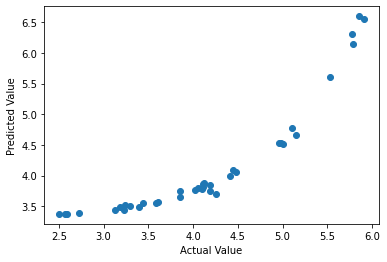

In [315]:
plt.scatter((y_test), (y_pred_r))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

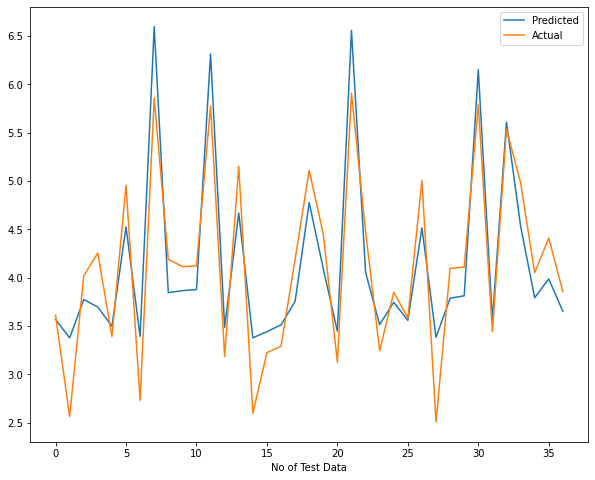

In [316]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_r)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Implementing cross validation on Ridge**

In [317]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [318]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.1780762816774646


In [319]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [321]:
# Test performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.18533063497139446
RMSE : 0.4305004471210157
MAE : 0.37324869430998114
R2 : 0.7951609169579754


Text(0, 0.5, 'Predicted Value')

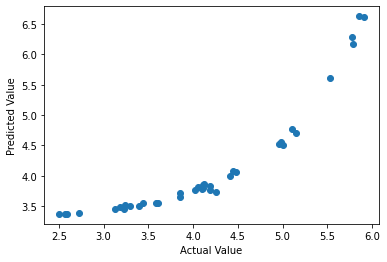

In [322]:
plt.scatter((y_test), (y_pred_ridge))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

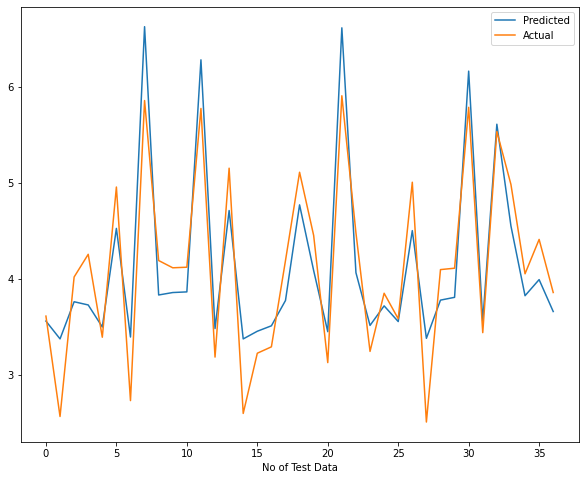

In [323]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()